# CAP 5768 - Data Science - Adam Corbin - Fall 2019

## Assignment 2: Exploratory data analysis

### Goals 

- To increase familiarity with the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To explore (manipulate, summarize, and visualize) datasets. 
- To improve the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.

### Instructions

- This assignment is structured in three parts, using a different dataset for each part.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 154 (plus up to 85 bonus points), distributed as follows: Part 1 (58+ pts), Part 2 (28+ pts), Part 3 (43+ pts), and Conclusions (25 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an exercise in performing exploratory data analysis; expanding (and practicing) your knowledge of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test hypotheses and  answer questions based on the available data (and associated summary statistics).
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 
- You must **organize your data files in the proper folders** for the code to work.

-------------------
## Part 1: The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. After extracting the data from the ZIP file (available on Canvas), we can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [3]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn import preprocessing

Before running the cell below, make sure that you have downloaded the movielens.zip file from Canvas, unzipped it, and placed its contents under the 'data' folder. 

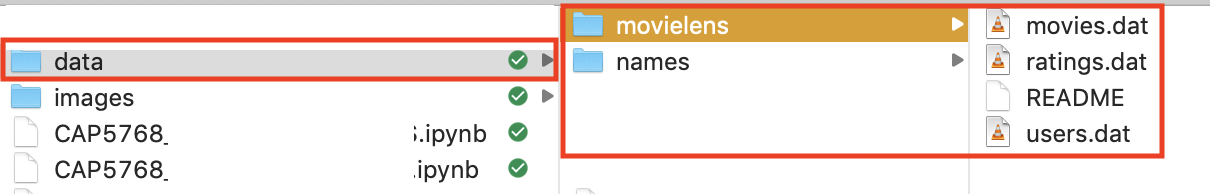

In [2]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [ ]:
!cat 'data/movielens/README'

## Solution

In [23]:
print("#1")
print("user count",len(users.index))
print("Columns: ", ", ".join(users.columns.to_list()))

#1
user count 6040
Columns:  user_id, gender, age, occupation, zip


In [24]:
print("#2")
print("movies count",len(movies.index))
print("Columns: ", ", ".join(movies.columns.to_list()))

#2
movies count 3883
Columns:  movie_id, title, genres


In [25]:
print("#3")
print("ratings count",len(ratings.index))
print("Columns: ", ", ".join(ratings.columns.to_list()))

#3
ratings count 1000209
Columns:  user_id, movie_id, rating, timestamp


In [75]:
print("#4")
print("How to relate Ratings to Movies and Users for 3 users and 2 movie ratings for each")
user_1 = users[users["user_id"] == 1]
user_2 = users[users["user_id"] == 4]
user_3 = users[users["user_id"] == 19]

user_set = [user_1, user_2, user_3]

for user in user_set:
    print("User:", user["user_id"].values[0])
                 
    # grab 3 ratings per user
    user_ratings = ratings[ratings["user_id"] == user["user_id"].values[0]][0:3]
    print("\t","Rating","\t", "Title")
    for index, rating in user_ratings.iterrows():
        movie = movies[movies["movie_id"] == rating["movie_id"]]
        print("\t",rating["rating"],"\t\t",movie["title"].values[0],"\t")
    print("---------------")
    print("\n\n")



#4
How to relate Ratings to Movies and Users for 3 users and 2 movie ratings for each
User: 1
	 Rating 	 Title
	 5 		 One Flew Over the Cuckoo's Nest (1975) 	
	 3 		 James and the Giant Peach (1996) 	
	 3 		 My Fair Lady (1964) 	
---------------



User: 4
	 Rating 	 Title
	 5 		 Hustler, The (1961) 	
	 3 		 Star Wars: Episode VI - Return of the Jedi (1983) 	
	 4 		 Fistful of Dollars, A (1964) 	
---------------



User: 19
	 Rating 	 Title
	 4 		 Who Framed Roger Rabbit? (1988) 	
	 4 		 For Your Eyes Only (1981) 	
	 3 		 Animal House (1978) 	
---------------





# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a histogram of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

## Solution

#5
Most occupation:  college/grad student


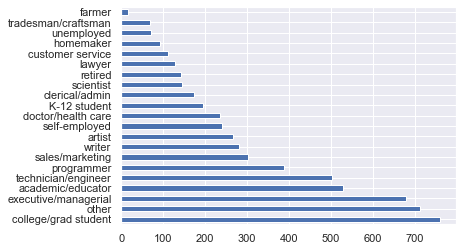

In [545]:
print("#5")

occupation_dict = {0:  "other",
	1:  "academic/educator",
	2:  "artist",
	  3:  "clerical/admin",
	  4:  "college/grad student",
	  5:  "customer service",
	  6:  "doctor/health care",
	  7:  "executive/managerial",
	  8:  "farmer",
	  9:  "homemaker",
	 10:  "K-12 student",
	 11:  "lawyer",
	 12:  "programmer",
	 13:  "retired",
	 14:  "sales/marketing",
	 15:  "scientist",
	 16:  "self-employed",
	 17:  "technician/engineer",
	 18:  "tradesman/craftsman",
	 19:  "unemployed",
	 20:  "writer"
}
cleanup_occupation = {"occupation" : occupation_dict}
most_index = users["occupation"].value_counts().index.tolist()[0]
print("Most occupation: ", occupation_dict[most_index])
updated_users = users.copy()
updated_users.replace(cleanup_occupation, inplace=True)
updated_users["occupation"].value_counts().plot.barh()

#6
Users 50 years or older:  14.5 %


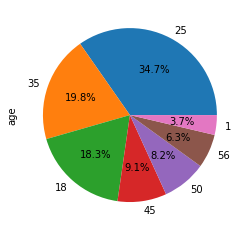

In [126]:
print("#6")
users_50_plus = users[users["age"] >= 50]
percent = round(len(users_50_plus) / len(users) * 100, 2)
print("Users 50 years or older: ", percent,"%")
users["age"].value_counts().plot(kind="pie",autopct='%1.1f%%')

#7
Most rated movie:  3359    Champ, The (1979)
Name: title, dtype: object


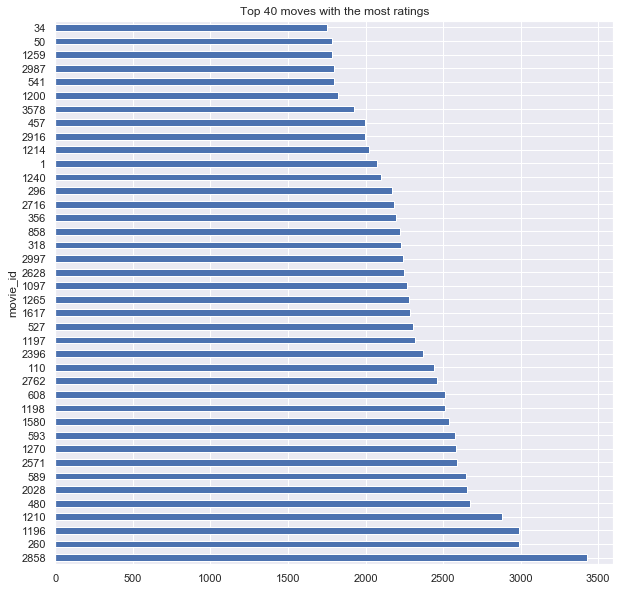

In [559]:
print("#7")
query = ratings.groupby('movie_id', as_index=False).size().sort_values(ascending=False)
num_1_movie_index = query.values[0]
movie_title = movies[movies['movie_id'] == num_1_movie_index]["title"]
print("Most rated movie: ", movie_title) #,"Rating", round(num_1_movie_rating,3))
query.head(n=40).plot.barh(figsize=(10,10), title="Top 40 moves with the most ratings")
#TODO - look at ratings average vs number of ratings?

In [154]:
print("#8")
print("Average rating of all movies", round(ratings["rating"].mean(),3))

#8
Average rating of all movies 3.582


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [203]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [369]:
# Build pivot table

mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Your turn! (10 points, i.e., 5 pts each)

Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

## Solution

In [365]:
print("#9")
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

#9


gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [536]:
print("#10")

# Steps Filter make sure movies have at least 300 movie ratings
# Then look at ratings from people 17 and younger

filtered_min_300_ratings = data.groupby("title").filter(lambda x: len(x) > 300)
young_filtered_min_300_ratings = filtered_min_300_ratings[filtered_min_300_ratings["age"] == 1]

top_young = young_filtered_min_300_ratings.pivot_table(
    'rating', index='title', aggfunc='mean')
sorted_top_young = top_young.sort_values(by='rating', ascending=False)
sorted_top_young.head(n=20)


#10


,rating
title,
Metropolis (1926),4.888889
GoodFellas (1990),4.840000
"Third Man, The (1949)",4.818182
Double Indemnity (1944),4.777778
"Piano, The (1993)",4.750000
Fried Green Tomatoes (1991),4.750000
Raging Bull (1980),4.714286
Roman Holiday (1953),4.687500
Citizen Kane (1941),4.680000


# BONUS! (up to 20 points)

Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

## Solution

Bonus 1
-------------
gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573


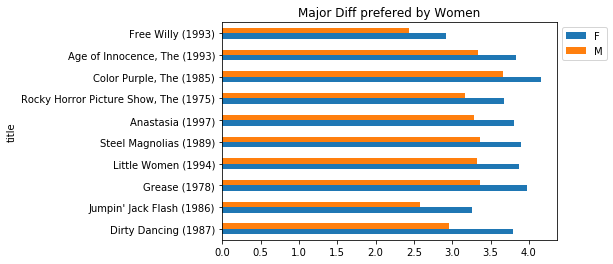

In [238]:
print("Bonus 1\n-------------")

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
top_10_diff = mean_ratings.sort_values(by='diff', ascending=True)[0:10]

print(top_10_diff)

top_10_diff[["F","M"]].plot.barh(title="Major Diff prefered by Women").legend(bbox_to_anchor=(1, 1))


Bonus 2
-------------
gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704


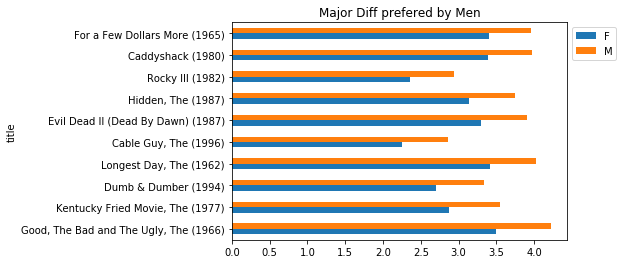

In [240]:
print("Bonus 2\n-------------")

top_10_diff = mean_ratings.sort_values(by='diff', ascending=False)[0:10]

print(top_10_diff)

top_10_diff[["F","M"]].plot.barh(title="Major Diff prefered by Men").legend(bbox_to_anchor=(1, 1))

# BONUS! (up to 10 points)

Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

## Solution

In [423]:
min_250_ratings_all = data.groupby("title").filter(lambda x: len(x) > 250)
std_data = min_250_ratings_all.pivot_table('rating', index='title', aggfunc='std')
print("Standard Deviation table")
std_data.sort_values(by='rating', ascending=False)[0:10]

Standard Deviation table


,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [253]:
var_data = min_250_ratings_all.pivot_table('rating', index='title', aggfunc='var')
print("Variance")
var_data.sort_values(by='rating', ascending=False)[0:10]

Variance table


,rating
title,
Dumb & Dumber (1994),1.745921
"Blair Witch Project, The (1999)",1.732824
Natural Born Killers (1994),1.708766
Tank Girl (1995),1.632506
"Rocky Horror Picture Show, The (1975)",1.588047
Eyes Wide Shut (1999),1.586651
Evita (1996),1.571591
Billy Madison (1995),1.562425
Fear and Loathing in Las Vegas (1998),1.553533


# BONUS! (up to 10 points)

Write Python code to answer the question: 
What is the most popular movie genre? 
Plot a histogram of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

## Solution

The top geners is
                              rating
genres                             
Animation|Comedy|Thriller  4.473837 

Largest genere count:  Drama    843
Name: genres, dtype: int64


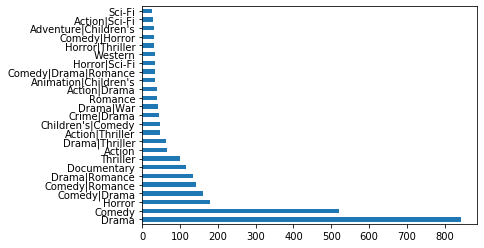

In [292]:
## TODO go back and use origional data frame and string manapulation on genera column

mean_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')

top = mean_ratings.sort_values(by='rating', ascending=False)[0:1]
print("The top geners is\n",top,"\n")


largest_genere = movies["genres"].value_counts().head(n=1)
print("Largest genere count: ", largest_genere)
movies["genres"].value_counts().head(n=25).plot.barh()

------------
## Part 2: Titanic

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [5]:
titanic = sns.load_dataset('titanic')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
titanic.head()

## Questions 11-14 (16 points total, i.e. 4 pts each)

Look at the Python code below and answer the following questions (expressing the amounts in absolute terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive? 
13. How many male passengers did not survive (regardless of their class)? 
14. How many third class male passengers did not survive? 

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Solution

TODO - Go back and update to absolute terms
11. **25.79%**
12. **3.19%**
13. **81.10%**
14. **75.76%**

In [ ]:
print("#11", len(titanic[(titanic["survived"] == "1") & (titanic["sex"] == "female")]))
print("#12", len(titanic[(titanic["survived"] == "0") & (titanic["sex"] == "female") & (titanic["class"] == "first")]))
print("#13", len(titanic[(titanic["survived"] == "0") & (titanic["sex"] == "male"))
print("#14", len(titanic[(titanic["survived"] == "0") & (titanic["sex"] == "female") & (titanic["class"] == "third")]))


## Your turn! (12 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class? 

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

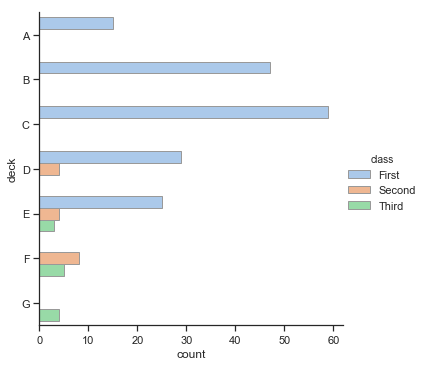

## Solution

#15 - passangers separated by deck and class
deck  class 
A     First     15
B     First     47
C     First     59
D     First     29
      Second     4
E     First     25
      Second     4
      Third      3
F     Second     8
      Third      5
G     Third      4
dtype: int64


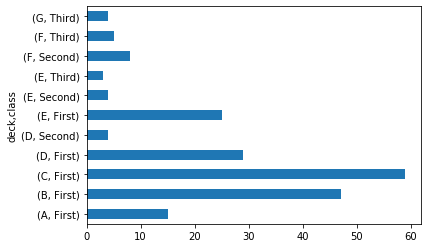

In [340]:
print("#15 - passangers separated by deck and class")
pd.set_option('display.max_rows', 25)
print(titanic.pivot_table(index=["deck","class"], values=[], aggfunc=len))
titanic.pivot_table(index=["deck","class"], values=[], aggfunc=len).plot.barh()


In [341]:
print("#16 - Survived on Deck A separated by classes")
survived = titanic[titanic["survived"] == 1]
survived_on_deck_a = survived[survived["deck"] == "A"]

table = survived_on_deck_a.pivot_table(index=["deck","class"], values=[], aggfunc=len)
table


#16 - Survived on Deck A separated by classes


deck  class
A     First    7
dtype: int64

In [342]:
print("#17 - Survived on Deck E separated by classes")
survived_on_deck_e = survived[survived["deck"] == "E"]
table = survived_on_deck_e.pivot_table(index=["deck","class"], values=[], aggfunc=len)
table

#17 - Survived on Deck E separated by classes


deck  class 
E     First     18
      Second     3
      Third      3
dtype: int64

# BONUS! (up to 20 points)

Write Python code to answer the following questions (using percentage values):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

## Solution

In [455]:
def get_percentage(numerator):
    return round(len(numerator)/len(titanic) * 100,2)

In [458]:
didnt_survive = titanic[titanic["survived"] == 0]
women_didnt_survive = didnt_survive[didnt_survive["sex"] == "female"]
alone_women_didnt_survive = women_didnt_survive[women_didnt_survive["alone"] == True]
print("% women alone who didnt survive ",get_percentage(alone_women_didnt_survive),"%", sep="")

% women alone who didnt survive 3.03%


In [461]:
men_didnt_survive = didnt_survive[didnt_survive["sex"] == "male" ]
over_35_men_didnt_survive = men_didnt_survive[men_didnt_survive["age"] >= 35]
print("% men over 35 didnt survive ",get_percentage(over_35_men_didnt_survive),"%", sep="")
younger_than_35_men_didnt_survive = men_didnt_survive[men_didnt_survive["age"] < 35]
print("% men younger than 35 didnt survive ",get_percentage(younger_than_35_men_didnt_survive),"%", sep="")

% men over 35 didnt survive 14.03%
% men younger than 35 didnt survive 26.37%


Average fair
             fare
class            
First   84.154687
Second  20.662183
Third   13.675550


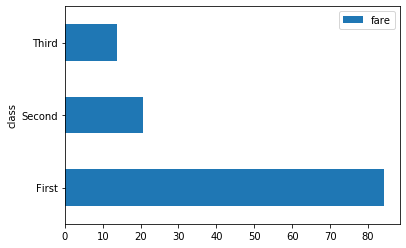

In [470]:
#Average fair
print("Average fair")
table = titanic.pivot_table(values="fare", index="class", aggfunc="mean")
print(table)
table.plot.barh()

------------
## Part 3: US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

For your convenience, I have made the _names.zip_ file available on Canvas. 
Before running the cell below, make sure that you have downloaded it, unzipped it, and placed its contents under the 'data' folder. 

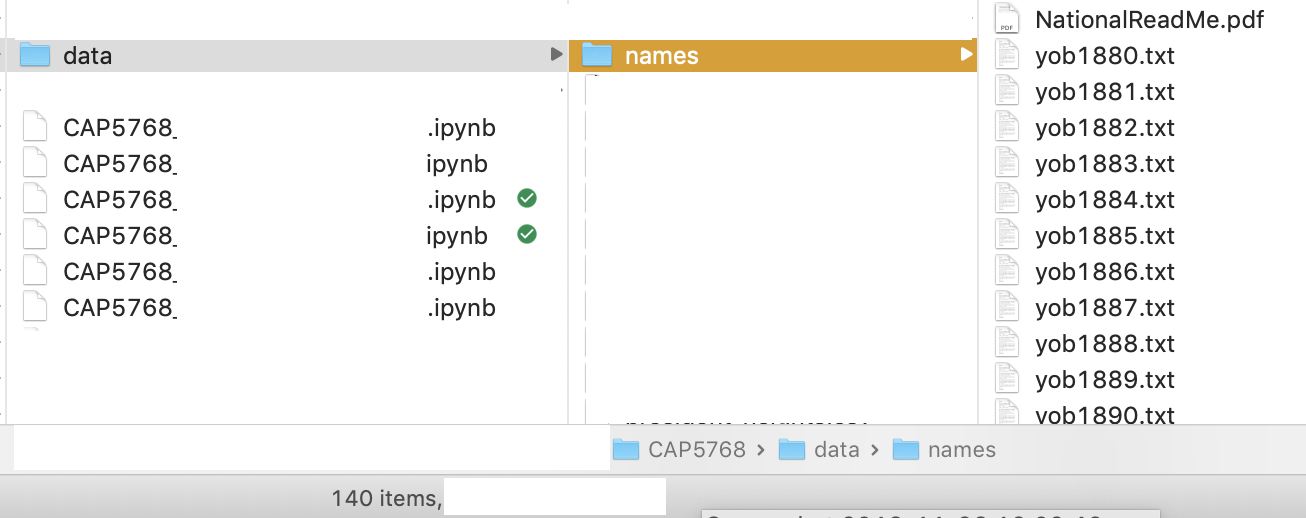

In [2]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [3]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


## Your turn! (25 points)

Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time. 

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:

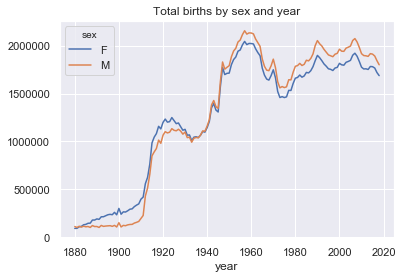

## Solution

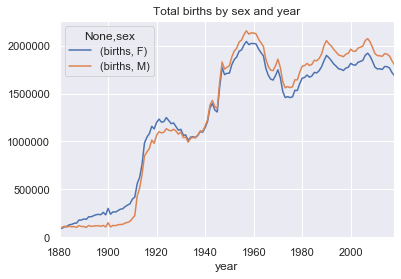

In [4]:
sns.set()
names_pivot = names.pivot_table( index="year", columns="sex", aggfunc=sum)
names_pivot.plot(title="Total births by sex and year")

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the absolute number of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [5]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [6]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [7]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [8]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [9]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [10]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [11]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [12]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020841C15548>,
      dtype=object)

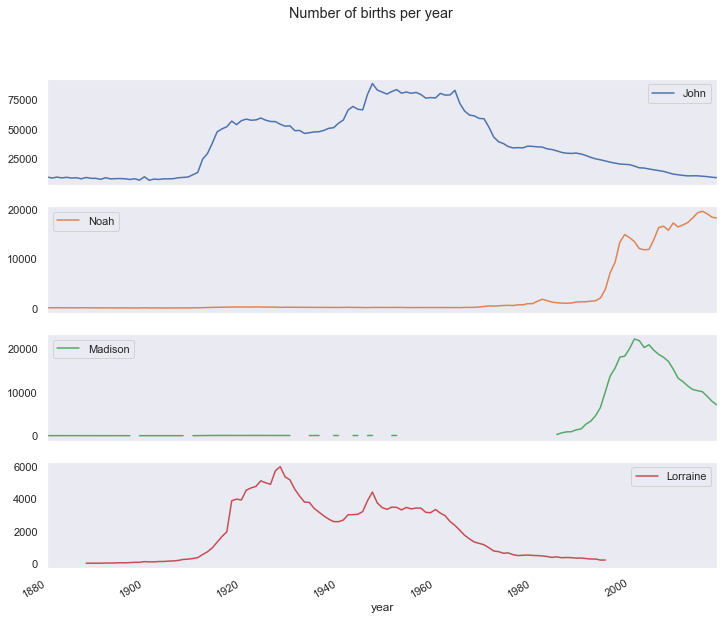

In [13]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

--------------
# BONUS! (up to 25 points)

Write Python code to test the hypothesis:

H1: There has been an increase in naming diversity over time. 

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

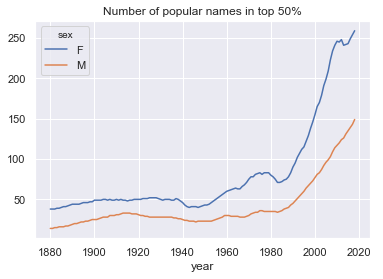

## Solution

In [53]:
def get_top_50_percent(group):
    # Loop over calculating the sum of the prop, when we hit .5 then return
    group = group.sort_values(by="prop", ascending=False)
    for i in range(0,len(group)):
        if group["prop"][:i].sum() >= .5:
            return group[:i]

# Loop over year, filter on sex, sort by prop, capture size
male_top_50_count = []
female_top_50_count = []
years = []

for year in range(1880,2018):
    years.append(year)
    selected_year = names[names["year"] == year]
    
    male_selected_year = selected_year[selected_year["sex"] == "M"]
    male_top_50 = get_top_50_percent(male_selected_year)
    male_top_50_count.append(len(male_top_50))
    
    female_selected_year = selected_year[selected_year["sex"] == "F"]
    female_top_50 = get_top_50_percent(female_selected_year)
    female_top_50_count.append(len(female_top_50))


Text(0, 0.5, 'Popular name count')

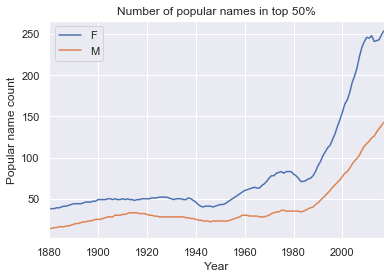

In [59]:
percent_data = {"F" : female_top_50_count, "M": male_top_50_count}
df = pd.DataFrame(percent_data, index = years)
df.plot.line(title="Number of popular names in top 50%")
plt.xlabel("Year")
plt.ylabel("Popular name count")

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [521]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [522]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [523]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)


<Figure size 432x288 with 0 Axes>

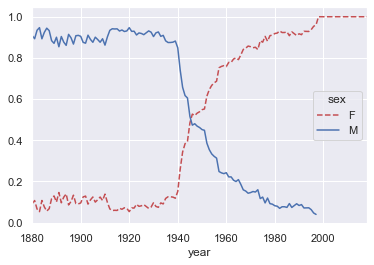

In [524]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypotheses, which we will call H2. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

H2: Biblical names such as ["Mary", "Noah", "Jesus", "Martha","Joseph","Adam] are becoming less popular over time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C1C877A88>,
      dtype=object)

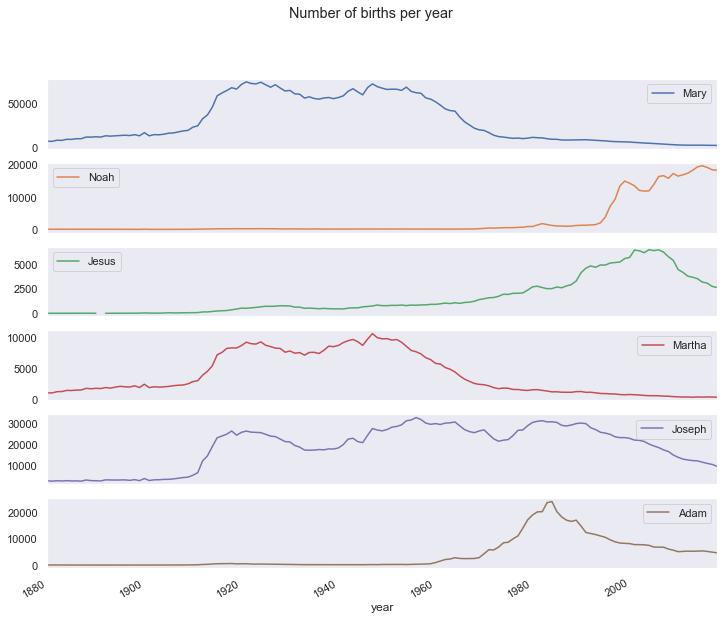

In [529]:
subset = total_births[["Mary", "Noah", "Jesus", "Martha", "Joseph", "Adam"]]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")


H2: From the small subset selected we see some trend in 5 of the 6 names going downward. If we stated this was the only list of biblical names then I would say this is confirmed.

H3: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

<Figure size 432x288 with 0 Axes>

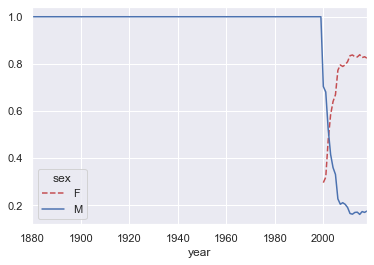

In [534]:
reese_like = all_names[all_names.str.lower() == 'reese']
filtered = top1000[top1000.name.isin(reese_like)]
filtered.groupby('name').births.sum()
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})


H3: Based on the previous plot there was a strong shift between male and female for Reese around 2000 where female overtook the majority percentage. H3 is confirmed.

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. I have a much better understanding of groupby and pivot tables. I think it will take some more practice with those methods to master them but I am getting more comfortable. 
2. On #10 I got tripped up on trying to filter the age first before the # of ratings. That messed me up but in the Slack group Christian pointed that out which was very helpful. I find that near the end of the assignments tend to go a little quicker which maybe is a good thing :). The titanic dataset is really fun to mess with. Probably because of how many different ways you can slice and filter the data. 
3. I felt maybe on the baby names dataset we could have done some more analysis so I would want to dive in there more. Maybe come up some more hypothesis to test.